Paso 1: Cargar el dataset y ver las primeras filas


In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('australian_user_items.csv')

# Mostrar las primeras filas
print(df.head())

# Ver el tama√±o del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")


             user_id  items_count           steam_id  \
0  76561197970982479          277  76561197970982479   
1            js41637          888  76561198035864385   
2          evcentric          137  76561198007712555   
3         Riot-Punch          328  76561197963445855   
4              doctr          541  76561198002099482   

                                            user_url  \
0  http://steamcommunity.com/profiles/76561197970...   
1               http://steamcommunity.com/id/js41637   
2             http://steamcommunity.com/id/evcentric   
3            http://steamcommunity.com/id/Riot-Punch   
4                 http://steamcommunity.com/id/doctr   

                                               items  
0  [{'item_id': '10', 'item_name': 'Counter-Strik...  
1  [{'item_id': '10', 'item_name': 'Counter-Strik...  
2  [{'item_id': '1200', 'item_name': 'Red Orchest...  
3  [{'item_id': '10', 'item_name': 'Counter-Strik...  
4  [{'item_id': '300', 'item_name': 'Day of Defea..

Paso 2: Ver tipos de datos y valores nulos

In [2]:
print(df.info())
print("\nValores nulos por columna:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  int64 
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.4+ MB
None

Valores nulos por columna:
 user_id        0
items_count    0
steam_id       0
user_url       0
items          0
dtype: int64


In [3]:
import ast

# Ver c√≥mo est√° guardado el campo 'items'
print(df['items'].iloc[0])
print("\nTipo actual:", type(df['items'].iloc[0]))

# Intentar convertirlo de str a lista real
example_items = ast.literal_eval(df['items'].iloc[0])
print("\nEjemplo de juego:", example_items[0])


[{'item_id': '10', 'item_name': 'Counter-Strike', 'playtime_forever': 6, 'playtime_2weeks': 0}, {'item_id': '20', 'item_name': 'Team Fortress Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '30', 'item_name': 'Day of Defeat', 'playtime_forever': 7, 'playtime_2weeks': 0}, {'item_id': '40', 'item_name': 'Deathmatch Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '50', 'item_name': 'Half-Life: Opposing Force', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '60', 'item_name': 'Ricochet', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '70', 'item_name': 'Half-Life', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '130', 'item_name': 'Half-Life: Blue Shift', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '300', 'item_name': 'Day of Defeat: Source', 'playtime_forever': 4733, 'playtime_2weeks': 0}, {'item_id': '240', 'item_name': 'Counter-Strike: Source', 'playtime_forever': 1853, 'playtime_2weeks': 0}, {'item_i

Paso 3: Expandir items y normalizar los dato

In [4]:
from ast import literal_eval
import pandas as pd

# Convertir strings en listas de diccionarios
df['items'] = df['items'].apply(literal_eval)

# Expandir en un nuevo DataFrame con una fila por juego
rows = []
for _, row in df.iterrows():
    user_id = row['user_id']
    for item in row['items']:
        item['user_id'] = user_id
        rows.append(item)

df_items = pd.DataFrame(rows)

# Ver las primeras filas del nuevo DataFrame
print(df_items.head())
print(f"\nFilas: {df_items.shape[0]}, Columnas: {df_items.shape[1]}")


  item_id                  item_name  playtime_forever  playtime_2weeks  \
0      10             Counter-Strike                 6                0   
1      20      Team Fortress Classic                 0                0   
2      30              Day of Defeat                 7                0   
3      40         Deathmatch Classic                 0                0   
4      50  Half-Life: Opposing Force                 0                0   

             user_id  
0  76561197970982479  
1  76561197970982479  
2  76561197970982479  
3  76561197970982479  
4  76561197970982479  

Filas: 5153209, Columnas: 5


Paso 4: Gr√°ficos iniciales

1. Top 20 juegos m√°s jugados por n√∫mero de usuarios

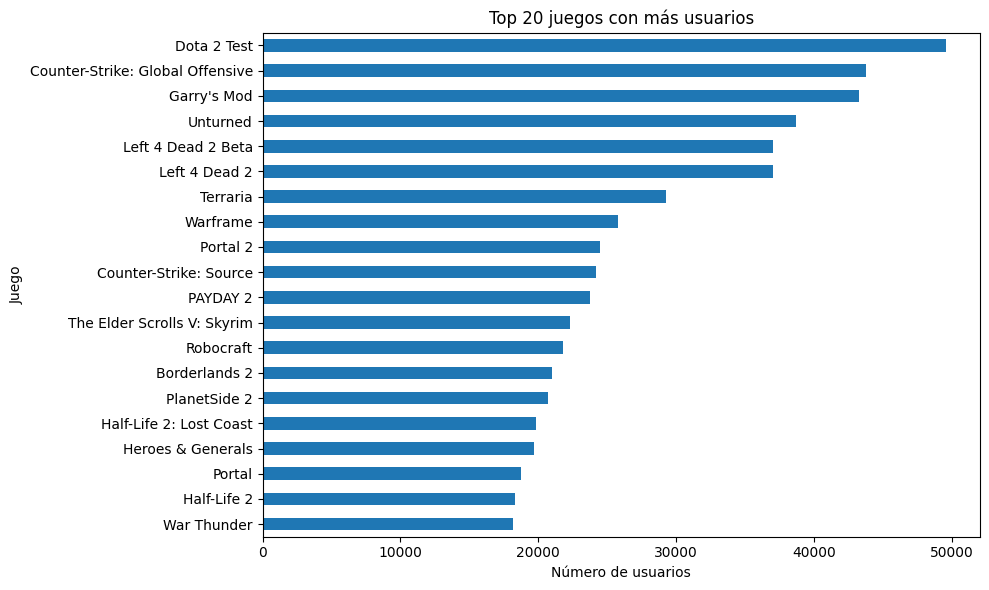

In [5]:
import matplotlib.pyplot as plt

top_games = df_items['item_name'].value_counts().head(20)

plt.figure(figsize=(10,6))
top_games.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 juegos con m√°s usuarios")
plt.xlabel("N√∫mero de usuarios")
plt.ylabel("Juego")
plt.tight_layout()
plt.show()


2. Distribuci√≥n de juegos por usuario

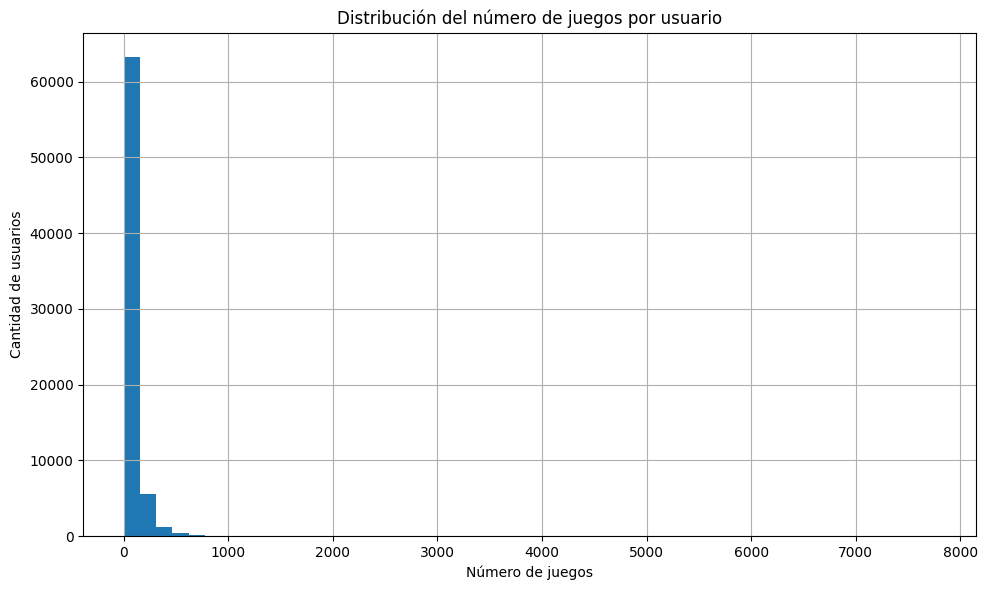

In [6]:
games_per_user = df_items.groupby('user_id')['item_id'].count()

plt.figure(figsize=(10,6))
games_per_user.hist(bins=50)
plt.title("Distribuci√≥n del n√∫mero de juegos por usuario")
plt.xlabel("N√∫mero de juegos")
plt.ylabel("Cantidad de usuarios")
plt.tight_layout()
plt.show()


3. Top 20 juegos m√°s jugados por tiempo total

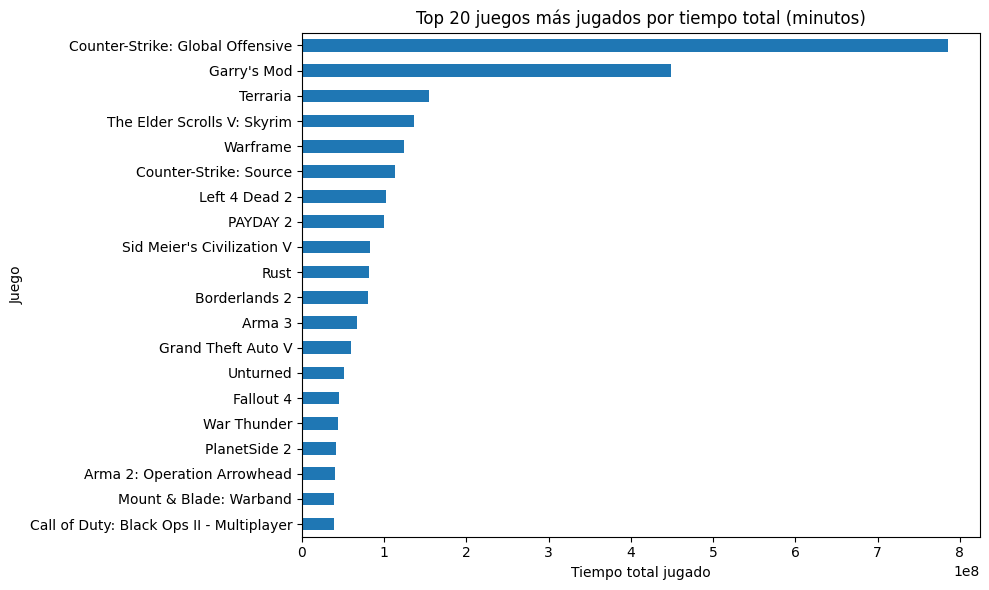

In [7]:
playtime_total = df_items.groupby('item_name')['playtime_forever'].sum()
top_played = playtime_total.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_played.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 juegos m√°s jugados por tiempo total (minutos)")
plt.xlabel("Tiempo total jugado")
plt.ylabel("Juego")
plt.tight_layout()
plt.show()


Paso 1.1 ‚Äì Filtrar juegos no jugados y usuarios con pocos juegos

In [8]:
# Eliminar juegos no jugados (playtime_forever = 0)
df_jugados = df_items[df_items['playtime_forever'] > 0].copy()

# Contar juegos jugados por usuario
juegos_por_usuario = df_jugados.groupby('user_id')['item_id'].count()

# Filtrar usuarios con al menos 5 juegos jugados
usuarios_validos = juegos_por_usuario[juegos_por_usuario >= 5].index
df_filtrado = df_jugados[df_jugados['user_id'].isin(usuarios_validos)]

print(f"Interacciones originales: {df_items.shape[0]}")
print(f"Interacciones con tiempo jugado: {df_jugados.shape[0]}")
print(f"Despu√©s de filtrar usuarios con >=5 juegos: {df_filtrado.shape[0]}")
print(f"Usuarios √∫nicos: {df_filtrado['user_id'].nunique()}")
print(f"Juegos √∫nicos: {df_filtrado['item_id'].nunique()}")


Interacciones originales: 5153209
Interacciones con tiempo jugado: 3285246
Despu√©s de filtrar usuarios con >=5 juegos: 3265727
Usuarios √∫nicos: 59763
Juegos √∫nicos: 10048


Paso 1.2 ‚Äì Crear matriz de usuario-juego binaria

In [9]:
# Matriz binaria: 1 si ha jugado el juego (playtime > 0)
matriz_binaria = df_filtrado.copy()
matriz_binaria['valor'] = 1

matriz_binaria = matriz_binaria.pivot_table(index='user_id', columns='item_id', values='valor', fill_value=0)

print("Matriz binaria creada. Tama√±o:", matriz_binaria.shape)


Matriz binaria creada. Tama√±o: (59763, 10048)


Paso 1.3 ‚Äì Crear matriz ponderada con playtime_forever

In [10]:
import numpy as np

# Copiar y aplicar logaritmo a los minutos jugados (sumamos 1 para evitar log(0))
df_playtime = df_filtrado.copy()
df_playtime['valor'] = np.log1p(df_playtime['playtime_forever'])

# Crear matriz usuario-juego ponderada
matriz_playtime = df_playtime.pivot_table(index='user_id', columns='item_id', values='valor', fill_value=0)

print("Matriz ponderada creada. Tama√±o:", matriz_playtime.shape)


Matriz ponderada creada. Tama√±o: (59763, 10048)


In [11]:
# Eliminar interacciones con menos de 60 minutos (1 hora)
df_jugado_60min = df_filtrado[df_filtrado['playtime_forever'] >= 60]

# Recontar juegos por usuario tras filtrar
usuarios_validos = df_jugado_60min['user_id'].value_counts()
usuarios_validos = usuarios_validos[usuarios_validos >= 5].index

df_filtrado_60min = df_jugado_60min[df_jugado_60min['user_id'].isin(usuarios_validos)]

print(f"Interacciones restantes: {df_filtrado_60min.shape[0]}")
print(f"Usuarios √∫nicos: {df_filtrado_60min['user_id'].nunique()}")
print(f"Juegos √∫nicos: {df_filtrado_60min['item_id'].nunique()}")


Interacciones restantes: 2305138
Usuarios √∫nicos: 56850
Juegos √∫nicos: 8779


FASE 2 ‚Äì Clustering de usuarios

Paso 2.1 ‚Äì Reducci√≥n de dimensionalidad con PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar antes de PCA
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(matriz_binaria)

# Aplicar PCA para reducir a 50 dimensiones
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Dimensiones reducidas. Nueva forma:", X_pca.shape)


Dimensiones reducidas. Nueva forma: (59763, 50)


Paso 2.2 ‚Äì Aplicar KMeans

In [13]:
# Crear matriz binaria (juegos con al menos 60 min jugados)
df_binaria_60min = df_filtrado_60min.copy()
df_binaria_60min['valor'] = 1

matriz_binaria_60min = df_binaria_60min.pivot_table(
    index='user_id',
    columns='item_id',
    values='valor',
    fill_value=0
)

print("Matriz binaria limpia creada. Tama√±o:", matriz_binaria_60min.shape)


Matriz binaria limpia creada. Tama√±o: (56850, 8779)


Paso 2.3 ‚Äì Clustering con KMeans


In [14]:
from sklearn.cluster import KMeans

# Aplicar KMeans directamente sobre la matriz limpia
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(matriz_binaria_60min)

# A√±adir clusters a la matriz
matriz_binaria_60min['cluster'] = clusters

# Ver distribuci√≥n de usuarios por cluster
print(matriz_binaria_60min['cluster'].value_counts().sort_index())


cluster
0        1
1    30756
2     4137
3    10550
4    11406
Name: count, dtype: int64


 Paso 2.4 ‚Äì Juegos m√°s jugados por cluster

In [16]:
# Necesitamos el dataframe original de interacciones filtrado con tiempo >= 60 min
# y el cluster asociado a cada usuario

# Merge entre df_filtrado_60min y los clusters
df_clusters = df_filtrado_60min.merge(
    matriz_binaria_60min['cluster'],
    left_on='user_id',
    right_index=True
)

# Agrupar por cluster y juego para contar cu√°ntos usuarios de ese cluster jugaron ese juego
top_juegos_por_cluster = (
    df_clusters.groupby(['cluster', 'item_name'])['user_id']
    .nunique()
    .reset_index(name='n_usuarios')
)

# Elegir los 10 juegos m√°s jugados por cluster
top_juegos_cluster = (
    top_juegos_por_cluster.sort_values(['cluster', 'n_usuarios'], ascending=[True, False])
    .groupby('cluster')
    .head(10)
)

# Mostrar los 10 juegos m√°s jugados por cada cluster
for cluster_id in sorted(top_juegos_cluster['cluster'].unique()):
    print(f"\nüß© Top 10 juegos del cluster {cluster_id}:\n")
    top_juegos = top_juegos_cluster[top_juegos_cluster['cluster'] == cluster_id]
    for _, row in top_juegos.iterrows():
        print(f"{row['item_name']} ‚Äî {row['n_usuarios']} usuarios")




üß© Top 10 juegos del cluster 0:

Alien: Isolation ‚Äî 1 usuarios
Arma 2 ‚Äî 1 usuarios
Arma 2: DayZ Mod ‚Äî 1 usuarios
Arma 2: Operation Arrowhead ‚Äî 1 usuarios
Arma 2: Operation Arrowhead Beta (Obsolete) ‚Äî 1 usuarios
Aura Kingdom ‚Äî 1 usuarios
BlazBlue: Calamity Trigger ‚Äî 1 usuarios
Card Hunter ‚Äî 1 usuarios
Counter-Strike: Global Offensive ‚Äî 1 usuarios
Cry of Fear ‚Äî 1 usuarios

üß© Top 10 juegos del cluster 1:

Counter-Strike: Global Offensive ‚Äî 17678 usuarios
Garry's Mod ‚Äî 16301 usuarios
Left 4 Dead 2 ‚Äî 12024 usuarios
Unturned ‚Äî 11410 usuarios
Terraria ‚Äî 8014 usuarios
Warframe ‚Äî 6263 usuarios
Portal 2 ‚Äî 6121 usuarios
Counter-Strike: Source ‚Äî 5803 usuarios
PAYDAY 2 ‚Äî 5123 usuarios
The Elder Scrolls V: Skyrim ‚Äî 4853 usuarios

üß© Top 10 juegos del cluster 2:

Left 4 Dead 2 ‚Äî 3666 usuarios
Counter-Strike: Global Offensive ‚Äî 3655 usuarios
Garry's Mod ‚Äî 3561 usuarios
The Elder Scrolls V: Skyrim ‚Äî 3540 usuarios
Terraria ‚Äî 3527 usuarios
Borderl

FASE 3 ‚Äì Entrenamiento del recomendador con LightFM

Paso 3.1 ‚Äì Preparar los datos para LightFM

In [17]:
from scipy.sparse import csr_matrix

# Eliminar usuarios del cluster 0 (el outlier)
matriz_modelo = matriz_playtime.loc[matriz_binaria_60min[matriz_binaria_60min['cluster'] != 0].index]

# Crear matriz de interacciones en formato sparse
interactions = csr_matrix(matriz_modelo.values)

# Mapear √≠ndices reales a posiciones
user_ids = matriz_modelo.index.tolist()
item_ids = matriz_modelo.columns.tolist()

print("Matriz de interacciones creada. Tama√±o:", interactions.shape)


Matriz de interacciones creada. Tama√±o: (56849, 10048)


Paso 3.2 ‚Äì Crear user_features con los clusters

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Obtener solo los usuarios v√°lidos con cluster distinto de 0
usuarios_validos = matriz_modelo.index
clusters_filtrados = matriz_binaria_60min.loc[usuarios_validos, ['cluster']]

# One-hot encoding de los clusters
encoder = OneHotEncoder()
user_features_array = encoder.fit_transform(clusters_filtrados)

print("Matriz user_features creada. Forma:", user_features_array.shape)


Matriz user_features creada. Forma: (56849, 4)


Paso 3.3 ‚Äì Entrenar modelo LightFM

In [19]:
from lightfm import LightFM
from lightfm.data import Dataset

# Entrenar modelo
model = LightFM(loss='warp', random_state=42)
model.fit(interactions, user_features=user_features_array, epochs=15, num_threads=4)


Paso 3.4 ‚Äì Evaluar el modelo

In [20]:
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k

# Dividir en 80% train, 20% test
train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=42)

# Entrenar sobre train
model = LightFM(loss='warp', random_state=42)
model.fit(train, user_features=user_features_array, epochs=15, num_threads=4)

# Evaluar sobre test
precision = precision_at_k(model, test, user_features=user_features_array, k=10).mean()
recall = recall_at_k(model, test, user_features=user_features_array, k=10).mean()

print(f"üìà Precision@10: {precision:.4f}")
print(f"üìà Recall@10:    {recall:.4f}")


üìà Precision@10: 0.1055
üìà Recall@10:    0.1416


Paso 3.5 ‚Äì Ajuste de hiperpar√°metros

In [21]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.cross_validation import random_train_test_split

# Dividir en train/test de nuevo
train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=42)

# Par√°metros a probar
losses = ['warp', 'bpr', 'warp-kos']
components = [32, 64, 128]
learning_rates = [0.01, 0.05, 0.1]

mejores_resultados = []

for loss in losses:
    for no_components in components:
        for lr in learning_rates:
            model = LightFM(loss=loss, no_components=no_components, learning_rate=lr, random_state=42)
            model.fit(train, user_features=user_features_array, epochs=10, num_threads=4)
            prec = precision_at_k(model, test, user_features=user_features_array, k=10).mean()
            print(f"üîç {loss} | {no_components} components | lr={lr:.3f} ‚Üí precision@10: {prec:.4f}")
            mejores_resultados.append((loss, no_components, lr, prec))

# Mostrar el mejor
mejor = max(mejores_resultados, key=lambda x: x[3])
print(f"\n‚úÖ Mejor configuraci√≥n: {mejor[0]} | {mejor[1]} components | lr={mejor[2]} ‚Üí precision@10: {mejor[3]:.4f}")


üîç warp | 32 components | lr=0.010 ‚Üí precision@10: 0.1055
üîç warp | 32 components | lr=0.050 ‚Üí precision@10: 0.1053
üîç warp | 32 components | lr=0.100 ‚Üí precision@10: 0.1052
üîç warp | 64 components | lr=0.010 ‚Üí precision@10: 0.1055
üîç warp | 64 components | lr=0.050 ‚Üí precision@10: 0.1056
üîç warp | 64 components | lr=0.100 ‚Üí precision@10: 0.1054
üîç warp | 128 components | lr=0.010 ‚Üí precision@10: 0.1054
üîç warp | 128 components | lr=0.050 ‚Üí precision@10: 0.1052
üîç warp | 128 components | lr=0.100 ‚Üí precision@10: 0.1056
üîç bpr | 32 components | lr=0.010 ‚Üí precision@10: 0.0685
üîç bpr | 32 components | lr=0.050 ‚Üí precision@10: 0.0493
üîç bpr | 32 components | lr=0.100 ‚Üí precision@10: 0.0515
üîç bpr | 64 components | lr=0.010 ‚Üí precision@10: 0.0601
üîç bpr | 64 components | lr=0.050 ‚Üí precision@10: 0.0469
üîç bpr | 64 components | lr=0.100 ‚Üí precision@10: 0.0441
üîç bpr | 128 components | lr=0.010 ‚Üí precision@10: 0.0566
üîç bpr | 

Paso 4.1 ‚Äì Obtener informaci√≥n de los juegos

In [41]:
import requests
import pandas as pd

# üîë Elige una de tus claves (puedes rotarlas si haces m√°s cosas luego)
STEAM_API_KEY = 'F5E52AD27E9DC7006A2068AA05B6EE04'  # Diego

# üîÅ Cargar item_ids que t√∫ ya tienes (columnas de la matriz de juegos)
item_ids = list(matriz_modelo.columns.astype(str))

# üì¶ Llamada al endpoint oficial de Steam
print("üì• Descargando listado de juegos oficiales de Steam...")
url = f'https://api.steampowered.com/ISteamApps/GetAppList/v2/'
response = requests.get(url)
data = response.json()

# ‚úÖ Extraer todos los app_ids oficiales
steam_apps = data['applist']['apps']
app_ids_validos = set(str(app['appid']) for app in steam_apps)

# ‚úÇÔ∏è Filtrar tus juegos con los que s√≠ existen oficialmente
item_ids_filtrados = [app_id for app_id in item_ids if app_id in app_ids_validos]

# üíæ Guardar para usarlos luego en el scraping
pd.DataFrame({'item_id': item_ids_filtrados}).to_csv('item_ids_filtrados.csv', index=False)

print(f"‚úÖ De {len(item_ids)} juegos, se han filtrado {len(item_ids_filtrados)} v√°lidos oficialmente.")


üì• Descargando listado de juegos oficiales de Steam...
‚úÖ De 10048 juegos, se han filtrado 7424 v√°lidos oficialmente.


In [42]:
df_ids = pd.read_csv('item_ids_filtrados.csv')
item_ids = df_ids['item_id'].astype(str).tolist()


In [1]:
import pandas as pd
import requests
import time
import os

# üîß Configuraci√≥n
GUARDAR_CADA = 50
OUTPUT_PATH = 'item_metadata_steam.csv'
ERRORES_PATH = 'errores.csv'
PENDIENTES_PATH = 'pendientes.csv'
ESPERA_ENTRE_JUEGOS = 0.5
MAX_REINTENTOS = 3

# üì• Cargar juegos v√°lidos desde el filtrado oficial
df_ids = pd.read_csv('item_ids_filtrados.csv')
item_ids = df_ids['item_id'].astype(str).tolist()

# üîÅ Reanudar si ya existen resultados previos
procesados = set()
datos_juegos = []
errores = []
pendientes = []

if os.path.exists(OUTPUT_PATH):
    df_existente = pd.read_csv(OUTPUT_PATH)
    procesados = set(df_existente['item_id'].astype(str))
    datos_juegos = df_existente.to_dict('records')
    print(f"üîÅ Reanudando. Ya hay {len(procesados)} juegos guardados.")

if os.path.exists(ERRORES_PATH):
    errores = pd.read_csv(ERRORES_PATH)['item_id'].astype(str).tolist()

if os.path.exists(PENDIENTES_PATH):
    pendientes = pd.read_csv(PENDIENTES_PATH)['item_id'].astype(str).tolist()

# üß† Funci√≥n robusta con reintentos
def obtener_info_juego(app_id):
    url = f"https://store.steampowered.com/api/appdetails?appids={app_id}"
    for intento in range(MAX_REINTENTOS):
        try:
            r = requests.get(url, timeout=15)
            data = r.json()

            if data and str(app_id) in data:
                juego = data[str(app_id)]
                if juego.get('success', False) and 'data' in juego:
                    info = juego['data']
                    return {
                        'item_id': str(app_id),
                        'genres': [g['description'] for g in info.get('genres', [])],
                        'categories': [c['description'] for c in info.get('categories', [])],
                        'tags': list(info.get('tags', {}).keys()) if 'tags' in info else []
                    }
                else:
                    print(f"‚õî {app_id} ‚Üí success: False o sin datos")
                    errores.append(str(app_id))
                    return None
        except Exception as e:
            print(f"‚ö†Ô∏è [{intento+1}/{MAX_REINTENTOS}] Error con {app_id}: {e}")
            time.sleep(3)

    print(f"‚ùå {app_id} ‚Üí Error de red persistente. A√±adiendo a pendientes.")
    pendientes.append(str(app_id))
    return None

# üöÄ Proceso principal
for idx, app_id in enumerate(item_ids):
    if app_id in procesados or app_id in errores or app_id in pendientes:
        continue

    info = obtener_info_juego(app_id)
    if info:
        datos_juegos.append(info)
        procesados.add(app_id)

    time.sleep(ESPERA_ENTRE_JUEGOS)

    if len(datos_juegos) % GUARDAR_CADA == 0:
        pd.DataFrame(datos_juegos).to_csv(OUTPUT_PATH, index=False)
        pd.DataFrame({'item_id': errores}).to_csv(ERRORES_PATH, index=False)
        pd.DataFrame({'item_id': pendientes}).to_csv(PENDIENTES_PATH, index=False)
        print(f"üíæ Guardados {len(datos_juegos)} juegos...")

# üíæ Guardar al final
pd.DataFrame(datos_juegos).to_csv(OUTPUT_PATH, index=False)
pd.DataFrame({'item_id': errores}).to_csv(ERRORES_PATH, index=False)
pd.DataFrame({'item_id': pendientes}).to_csv(PENDIENTES_PATH, index=False)
print("‚úÖ Finalizado y guardado todo.")


‚õî 109410 ‚Üí success: False o sin datos
‚õî 113900 ‚Üí success: False o sin datos
‚õî 203850 ‚Üí success: False o sin datos
‚õî 205180 ‚Üí success: False o sin datos
üíæ Guardados 50 juegos...
‚õî 205790 ‚Üí success: False o sin datos
‚õî 205890 ‚Üí success: False o sin datos
‚õî 205930 ‚Üí success: False o sin datos
‚õî 206740 ‚Üí success: False o sin datos
‚õî 206980 ‚Üí success: False o sin datos
‚õî 207060 ‚Üí success: False o sin datos
‚õî 207210 ‚Üí success: False o sin datos
üíæ Guardados 100 juegos...
‚õî 207890 ‚Üí success: False o sin datos
‚õî 208030 ‚Üí success: False o sin datos
‚õî 208610 ‚Üí success: False o sin datos
‚õî 209340 ‚Üí success: False o sin datos
üíæ Guardados 150 juegos...
‚õî 210410 ‚Üí success: False o sin datos
‚õî 210990 ‚Üí success: False o sin datos
‚õî 211070 ‚Üí success: False o sin datos
‚õî 211380 ‚Üí success: False o sin datos
‚õî 211880 ‚Üí success: False o sin datos
‚õî 212180 ‚Üí success: False o sin datos
‚õî 212200 ‚Üí success: False o 

In [5]:
import pandas as pd
import requests
import time
import os

# üìÅ Archivos
OUTPUT_PATH = 'item_metadata_steam.csv'
PENDIENTES_PATH = 'pendientes.csv'

# ‚öôÔ∏è Configuraci√≥n
MAX_REINTENTOS = 3
ESPERA_ENTRE_JUEGOS = 0.5

# üß† Funci√≥n para obtener metadatos
def obtener_info_juego(app_id):
    url = f"https://store.steampowered.com/api/appdetails?appids={app_id}"
    for intento in range(MAX_REINTENTOS):
        try:
            r = requests.get(url, timeout=15)
            data = r.json()
            if data and str(app_id) in data:
                juego = data[str(app_id)]
                if juego.get('success', False) and 'data' in juego:
                    info = juego['data']
                    return {
                        'item_id': str(app_id),
                        'genres': [g['description'] for g in info.get('genres', [])],
                        'categories': [c['description'] for c in info.get('categories', [])],
                        'tags': list(info.get('tags', {}).keys()) if 'tags' in info else []
                    }
        except Exception as e:
            print(f"‚ö†Ô∏è [{intento+1}/{MAX_REINTENTOS}] Error con {app_id}: {e}")
            time.sleep(3)
    print(f"‚ùå {app_id} ‚Üí sigue fallando.")
    return None

# üîÅ Bucle continuo mientras haya pendientes
while True:
    if not os.path.exists(PENDIENTES_PATH):
        print("‚ùå No existe 'pendientes.csv'. Nada que hacer.")
        break

    pendientes_df = pd.read_csv(PENDIENTES_PATH, dtype=str)
    if pendientes_df.empty:
        print("‚úÖ Todos los juegos han sido procesados.")
        break

    pendientes = pendientes_df['item_id'].tolist()

    # Cargar juegos ya procesados
    if os.path.exists(OUTPUT_PATH):
        procesados = set(pd.read_csv(OUTPUT_PATH, usecols=['item_id'], dtype=str)['item_id'])
        datos_existentes = pd.read_csv(OUTPUT_PATH)
    else:
        procesados = set()
        datos_existentes = pd.DataFrame()

    actualizados = False

    print(f"üîÅ Procesando {len(pendientes)} juegos pendientes...")
    nuevos_pendientes = []

    for app_id in pendientes:
        if app_id in procesados:
            print(f"‚úÖ {app_id} ya estaba procesado. Eliminado de pendientes.")
            continue

        info = obtener_info_juego(app_id)
        if info:
            print(f"üìù Guardando datos de {app_id}...")
            datos_existentes = pd.concat([datos_existentes, pd.DataFrame([info])], ignore_index=True)
            datos_existentes.to_csv(OUTPUT_PATH, index=False)
            actualizados = True
        else:
            nuevos_pendientes.append(app_id)

        time.sleep(ESPERA_ENTRE_JUEGOS)

    # Guardar nuevos pendientes
    pd.DataFrame({'item_id': nuevos_pendientes}).to_csv(PENDIENTES_PATH, index=False)

    if not nuevos_pendientes:
        print("üéâ ¬°Todos los juegos se han procesado correctamente!")
        break
    elif not actualizados:
        print("üîÅ Reintentando todos los juegos que siguen fallando...")
        time.sleep(5)


üîÅ Procesando 54 juegos pendientes...
‚ùå 234060 ‚Üí sigue fallando.
‚ùå 234530 ‚Üí sigue fallando.
‚ùå 234740 ‚Üí sigue fallando.
‚ùå 234980 ‚Üí sigue fallando.


KeyboardInterrupt: 

In [6]:
import pandas as pd
import ast

# Archivos
RUTA_ORIGINAL = 'australian_user_items.csv'
RUTA_PENDIENTES = 'pendientes.csv'
RUTA_SALIDA = 'australian_user_items_filtrado.csv'

# üì• Cargar datasets
df = pd.read_csv(RUTA_ORIGINAL)
pendientes = set(pd.read_csv(RUTA_PENDIENTES, dtype=str)['item_id'])

print(f"üßπ Eliminando juegos con item_id en pendientes.csv ({len(pendientes)} juegos a eliminar)...")

# üß© Funci√≥n para limpiar cada fila
def filtrar_items(items_str):
    try:
        items = ast.literal_eval(items_str)
        items_filtrados = [i for i in items if i['item_id'] not in pendientes]
        return items_filtrados
    except:
        return []

# Aplicar limpieza
df['items'] = df['items'].apply(lambda x: filtrar_items(x))
df['items_count'] = df['items'].apply(len)

# Eliminar usuarios sin juegos
df = df[df['items_count'] > 0].reset_index(drop=True)

# Guardar resultado
df.to_csv(RUTA_SALIDA, index=False)
print(f"‚úÖ Dataset limpio guardado en '{RUTA_SALIDA}' con shape: {df.shape}")


üßπ Eliminando juegos con item_id en pendientes.csv (54 juegos a eliminar)...
‚úÖ Dataset limpio guardado en 'australian_user_items_filtrado.csv' con shape: (71502, 5)


In [7]:
import pandas as pd

# Rutas
RUTA_ORIGINAL = "australian_user_items.csv"
RUTA_FILTRADO = "australian_user_items_filtrado.csv"

# Cargar datasets
df_original = pd.read_csv(RUTA_ORIGINAL)
df_filtrado = pd.read_csv(RUTA_FILTRADO)

# C√°lculo
usuarios_original = df_original.shape[0]
usuarios_filtrados = df_filtrado.shape[0]
eliminados = usuarios_original - usuarios_filtrados

print(f"üë• Usuarios originales: {usuarios_original}")
print(f"‚úÖ Usuarios tras limpieza: {usuarios_filtrados}")
print(f"üóëÔ∏è Usuarios eliminados (sin juegos v√°lidos): {eliminados}")


üë• Usuarios originales: 88310
‚úÖ Usuarios tras limpieza: 71502
üóëÔ∏è Usuarios eliminados (sin juegos v√°lidos): 16808


In [8]:
import pandas as pd

# üìÅ Ruta del dataset limpio
RUTA_ENTRADA = "australian_user_items_filtrado.csv"
RUTA_SALIDA = "australian_user_items_final.csv"

# üîç Cargar datos
df = pd.read_csv(RUTA_ENTRADA)
print(f"üì• Cargado: {df.shape}")

# üéÆ Calcular frecuencia de cada juego
juegos_con_usuarios = df['items'].apply(eval).explode().apply(lambda x: x['item_id'])
frecuencia_juegos = juegos_con_usuarios.value_counts()

# üóëÔ∏è Identificar juegos sin ning√∫n usuario (aparecer√°n 0 veces despu√©s de limpieza)
juegos_validos = set(frecuencia_juegos.index.astype(str))

# üßπ Eliminar juegos hu√©rfanos de cada usuario
def filtrar_juegos_validos(lista):
    return [j for j in eval(lista) if j['item_id'] in juegos_validos]

df['items'] = df['items'].apply(filtrar_juegos_validos)

# ‚ùå Eliminar usuarios sin juegos tras esta limpieza final
df = df[df['items'].map(len) > 0]

# üíæ Guardar resultado final
df.to_csv(RUTA_SALIDA, index=False)
print(f"‚úÖ Dataset final guardado en '{RUTA_SALIDA}' con shape: {df.shape}")


üì• Cargado: (71502, 5)
‚úÖ Dataset final guardado en 'australian_user_items_final.csv' con shape: (71502, 5)


In [14]:
import pandas as pd

# Configuraci√≥n
RUTA = "australian_user_items_final.csv"
RUTA_SALIDA = "australian_user_items_filtrado_1h.csv"
MINUTOS_UMBRAL = 60

# üì• Cargar datos
print("üì• Cargando datos...")
df = pd.read_csv(RUTA)

# üßπ Filtrar juegos con m√°s de 60 minutos
def filtrar_juegos(juegos_raw):
    try:
        juegos = eval(juegos_raw)
        return [j for j in juegos if j.get("playtime_forever", 0) >= MINUTOS_UMBRAL]
    except:
        return []

print("üßº Filtrando juegos con menos de 1h jugada...")
df["items_filtrados"] = df["items"].apply(filtrar_juegos)
df["n_items"] = df["items_filtrados"].apply(len)
df_filtrado = df[df["n_items"] > 0].drop(columns=["items", "n_items"])
df_filtrado = df_filtrado.rename(columns={"items_filtrados": "items"})

# üíæ Guardar
df_filtrado.to_csv(RUTA_SALIDA, index=False)
print(f"‚úÖ Dataset filtrado guardado en '{RUTA_SALIDA}' con shape: {df_filtrado.shape}")


üì• Cargando datos...
üßº Filtrando juegos con menos de 1h jugada...
‚úÖ Dataset filtrado guardado en 'australian_user_items_filtrado_1h.csv' con shape: (67887, 5)


In [1]:
import pandas as pd

# üìÅ Rutas
RUTA_ENTRADA = "australian_user_items_final.csv"
RUTA_SALIDA = "australian_user_items_1h_limpio.csv"
MINUTOS_UMBRAL = 60  # M√≠nimo 1 hora jugada

# üì• Cargar dataset
print("üì• Cargando datos...")
df = pd.read_csv(RUTA_ENTRADA)

# üßπ Filtrar juegos con al menos 60 minutos
def filtrar_juegos(juegos_raw):
    try:
        juegos = eval(juegos_raw)
        return [j for j in juegos if j.get("playtime_forever", 0) >= MINUTOS_UMBRAL]
    except:
        return []

print("üßº Filtrando juegos con menos de 1h jugada...")
df["items_filtrados"] = df["items"].apply(filtrar_juegos)

# üóëÔ∏è Eliminar usuarios que se quedan sin juegos v√°lidos
df["n_juegos_validos"] = df["items_filtrados"].apply(len)
df_limpio = df[df["n_juegos_validos"] > 0].copy()

# üîÅ Reemplazar columna original y limpiar
df_limpio = df_limpio.drop(columns=["items", "n_juegos_validos"])
df_limpio = df_limpio.rename(columns={"items_filtrados": "items"})

# üíæ Guardar resultado
df_limpio.to_csv(RUTA_SALIDA, index=False)
print(f"‚úÖ Dataset limpio guardado en '{RUTA_SALIDA}' con shape: {df_limpio.shape}")


üì• Cargando datos...
üßº Filtrando juegos con menos de 1h jugada...
‚úÖ Dataset limpio guardado en 'australian_user_items_1h_limpio.csv' con shape: (67887, 5)


‚úÖ Dataset cargado: (67887, 5)
‚úÖ Interacciones expandidas: (2326284, 6)
üë• Usuarios √∫nicos: 67295
üéÆ Juegos √∫nicos: 8759

üìà Interacciones por usuario (describe):
count    67295.000000
mean        34.568452
std         52.208417
min          1.000000
25%          8.000000
50%         21.000000
75%         45.000000
max       2568.000000
Name: item_id, dtype: float64

üìà Interacciones por juego (describe):
count     8759.000000
mean       265.587852
std       1330.887203
min          1.000000
25%          4.000000
50%         18.000000
75%         80.000000
max      42240.000000
Name: user_id, dtype: float64


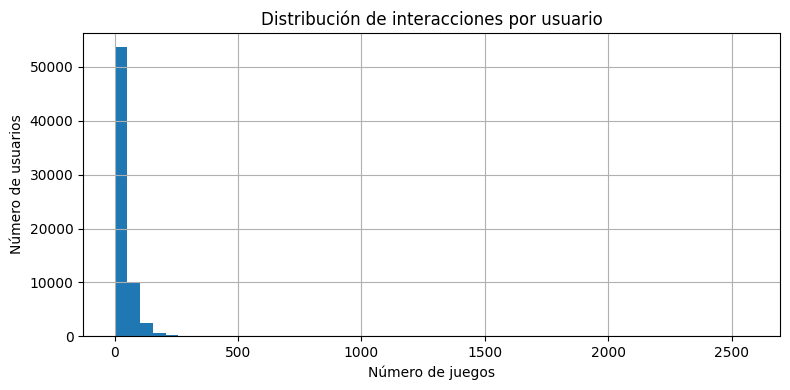

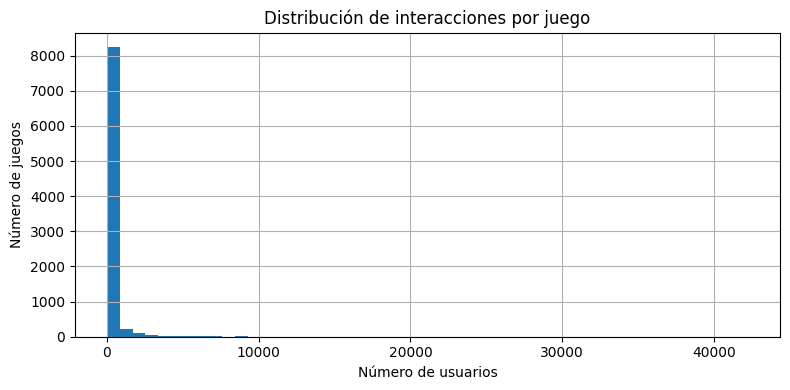

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# üì• Cargar dataset
df = pd.read_csv("australian_user_items_1h_limpio.csv")
print(f"‚úÖ Dataset cargado: {df.shape}")

# üßº Asegurar tipos
df = df[df["items"].notna()]
df["items"] = df["items"].apply(eval)  # convertir texto en lista de dicts

# üß® Expandir items
df_expandido = df.explode("items")
df_expandido["item_id"] = df_expandido["items"].apply(lambda x: x["item_id"])
df_expandido["user_id"] = df_expandido["user_id"].astype(str)
df_expandido["item_id"] = df_expandido["item_id"].astype(str)

print(f"‚úÖ Interacciones expandidas: {df_expandido.shape}")

# üìä N√∫mero de usuarios y juegos √∫nicos
n_usuarios = df_expandido["user_id"].nunique()
n_juegos = df_expandido["item_id"].nunique()
print(f"üë• Usuarios √∫nicos: {n_usuarios}")
print(f"üéÆ Juegos √∫nicos: {n_juegos}")

# üìä Interacciones por usuario
interacciones_usuario = df_expandido.groupby("user_id")["item_id"].count()
print("\nüìà Interacciones por usuario (describe):")
print(interacciones_usuario.describe())

# üìä Interacciones por juego
interacciones_juego = df_expandido.groupby("item_id")["user_id"].count()
print("\nüìà Interacciones por juego (describe):")
print(interacciones_juego.describe())

# üìâ Histograma: Interacciones por usuario
plt.figure(figsize=(8, 4))
interacciones_usuario.hist(bins=50)
plt.title("Distribuci√≥n de interacciones por usuario")
plt.xlabel("N√∫mero de juegos")
plt.ylabel("N√∫mero de usuarios")
plt.grid(True)
plt.tight_layout()
plt.show()

# üìâ Histograma: Interacciones por juego
plt.figure(figsize=(8, 4))
interacciones_juego.hist(bins=50)
plt.title("Distribuci√≥n de interacciones por juego")
plt.xlabel("N√∫mero de usuarios")
plt.ylabel("N√∫mero de juegos")
plt.grid(True)
plt.tight_layout()
plt.show()


üì• Cargando metadata...


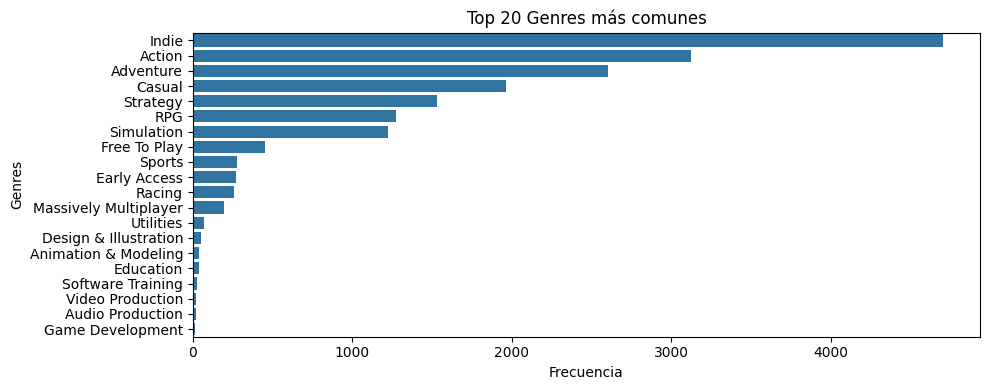


üîç Top 20 GENRES:
Indie                          4699
Action                         3125
Adventure                      2605
Casual                         1965
Strategy                       1530
RPG                            1274
Simulation                     1223
Free To Play                   453
Sports                         274
Early Access                   269
Racing                         256
Massively Multiplayer          193
Utilities                      70
Design & Illustration          52
Animation & Modeling           38
Education                      36
Software Training              28
Video Production               21
Audio Production               17
Game Development               16


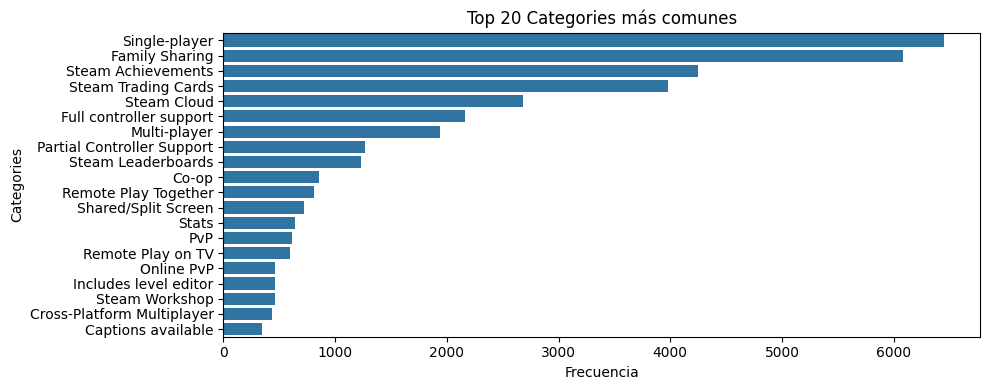


üîç Top 20 CATEGORIES:
Single-player                  6449
Family Sharing                 6085
Steam Achievements             4246
Steam Trading Cards            3980
Steam Cloud                    2680
Full controller support        2166
Multi-player                   1936
Partial Controller Support     1270
Steam Leaderboards             1229
Co-op                          859
Remote Play Together           812
Shared/Split Screen            721
Stats                          639
PvP                            615
Remote Play on TV              599
Online PvP                     467
Includes level editor          466
Steam Workshop                 461
Cross-Platform Multiplayer     437
Captions available             344
‚ùå No hay datos suficientes para tags.


In [3]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- Leer dataset ---
RUTA_METADATA = "item_metadata_steam.csv"
print("üì• Cargando metadata...")
df = pd.read_csv(RUTA_METADATA)
df["item_id"] = df["item_id"].astype(str)

# --- Asegurar que las columnas son listas ---
for col in ["genres", "categories", "tags"]:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x != "[]" else [])

# --- Contar frecuencias ---
frecuencias = {
    "genres": Counter(),
    "categories": Counter(),
    "tags": Counter()
}

for _, row in df.iterrows():
    for tipo in ["genres", "categories", "tags"]:
        frecuencias[tipo].update(row[tipo])

# --- Mostrar Top 20 ---
for tipo, counter in frecuencias.items():
    top_feats = counter.most_common(20)

    if not top_feats:
        print(f"‚ùå No hay datos suficientes para {tipo}.")
        continue

    etiquetas, valores = zip(*top_feats)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=valores, y=etiquetas)
    plt.title(f"Top 20 {tipo.capitalize()} m√°s comunes")
    plt.xlabel("Frecuencia")
    plt.ylabel(tipo.capitalize())
    plt.tight_layout()
    plt.show()

    # Tambi√©n imprimir por consola
    print(f"\nüîç Top 20 {tipo.upper()}:")
    for et, val in zip(etiquetas, valores):
        print(f"{et:<30} {val}")


In [14]:
import pandas as pd
import ast

# --- Paso 1: Cargar interacciones ---
print("üì• Cargando interacciones...")
df = pd.read_csv("australian_user_items_1h_limpio.csv")

# Eliminar registros con 'items' vac√≠os o nulos
df = df[df["items"].notna()]
df["items"] = df["items"].apply(ast.literal_eval)  # convertir string a lista real

# Explode para tener una fila por juego
interacciones = df.explode("items")
interacciones = interacciones[interacciones["items"].notna()]

# Extraer item_id de cada dict
def extraer_item_id(x):
    try:
        if isinstance(x, str):
            x = ast.literal_eval(x)
        if isinstance(x, dict):
            return x.get("item_id")
    except:
        return None

interacciones["item_id"] = interacciones["items"].apply(extraer_item_id)

# Limpiar NaNs si los hubiera
interacciones = interacciones.dropna(subset=["item_id"])
interacciones["item_id"] = interacciones["item_id"].astype(str)
interacciones["user_id"] = interacciones["user_id"].astype(str)
interacciones["valor"] = 1

print(f"‚úÖ Interacciones expandidas: {interacciones.shape}")
print(interacciones.head())


üì• Cargando interacciones...
‚úÖ Interacciones expandidas: (2326284, 7)
             user_id  items_count           steam_id  \
0  76561197970982479          276  76561197970982479   
0  76561197970982479          276  76561197970982479   
0  76561197970982479          276  76561197970982479   
0  76561197970982479          276  76561197970982479   
0  76561197970982479          276  76561197970982479   

                                            user_url  \
0  http://steamcommunity.com/profiles/76561197970...   
0  http://steamcommunity.com/profiles/76561197970...   
0  http://steamcommunity.com/profiles/76561197970...   
0  http://steamcommunity.com/profiles/76561197970...   
0  http://steamcommunity.com/profiles/76561197970...   

                                               items item_id  valor  
0  {'item_id': '300', 'item_name': 'Day of Defeat...     300      1  
0  {'item_id': '240', 'item_name': 'Counter-Strik...     240      1  
0  {'item_id': '3830', 'item_name': 'Psych

In [15]:
import pandas as pd
import ast

# --- Configuraci√≥n ---
RUTA_METADATA = "item_metadata_steam.csv"
RUTA_INTERACCIONES = "australian_user_items_1h_limpio.csv"
RUTA_SALIDA = "item_features_debug.csv"

# --- Paso 1: Cargar metadata e interacciones ---
print("üì• Cargando metadata y interacciones...")
metadata = pd.read_csv(RUTA_METADATA)
interacciones = pd.read_csv(RUTA_INTERACCIONES)

# Asegurar tipos
metadata["item_id"] = metadata["item_id"].astype(str)
interacciones = interacciones[interacciones["items"].notna()]
interacciones["items"] = interacciones["items"].apply(eval)
interacciones = interacciones.explode("items")
interacciones["item_id"] = interacciones["items"].apply(lambda x: str(x["item_id"]))

# Filtrar metadata a los items que aparecen en interacciones
item_ids_validos = set(interacciones["item_id"])
metadata = metadata[metadata["item_id"].isin(item_ids_validos)].copy()

# Convertir columnas string a listas
for col in ["genres", "categories", "tags"]:
    metadata[col] = metadata[col].apply(lambda x: ast.literal_eval(str(x)) if pd.notna(x) else [])

# Combinar en una columna unificada
metadata["features"] = metadata.apply(
    lambda row: list(set(row["genres"] + row["categories"] + row["tags"])),
    axis=1
)

# Guardar solo item_id y features
features_debug = metadata[["item_id", "features"]].explode("features").dropna()
features_debug["features"] = features_debug["features"].astype(str)
features_debug = features_debug.sort_values(by="item_id")

# Guardar como CSV para inspecci√≥n
features_debug.to_csv(RUTA_SALIDA, index=False)
print(f"‚úÖ Dataset de features guardado en '{RUTA_SALIDA}' con shape: {features_debug.shape}")



üì• Cargando metadata y interacciones...


KeyboardInterrupt: 

In [18]:
import pandas as pd

features_df = pd.read_csv("item_features_debug.csv")

# üßπ Cargar y limpiar
features_df["item_id"] = features_df["item_id"].astype(str).str.strip()
features_df["features"] = features_df["features"].astype(str).str.strip()

# ‚ùå Filtrar features vac√≠as o no imprimibles
features_df = features_df[features_df["features"].str.len() > 1]
features_df = features_df[features_df["features"].apply(lambda x: x.isprintable())]

# üîÅ Convertir todo a min√∫sculas si lo prefieres
features_df["features"] = features_df["features"].str.lower()

# üß© Agrupar features por item_id
features_por_item = (
    features_df.groupby("item_id")["features"]
    .apply(list)
    .reset_index()
    .values.tolist()
)  # esto da lista de (item_id, [features])

# üß± Fit con item_features exactas
all_users = interacciones["user_id"].astype(str).unique().tolist()
all_items = interacciones["item_id"].astype(str).unique().tolist()
all_features = features_df["features"].unique().tolist()

from lightfm.data import Dataset

dataset = Dataset()
dataset.fit(users=all_users, items=all_items)
dataset.fit_partial(items=all_items, item_features=all_features)

# ‚úÖ Verifica que todo est√© bien
usadas = set(sum([f for _, f in features_por_item], []))
registradas = set(dict(dataset._item_feature_mapping).keys())
no_registradas = usadas - registradas

if no_registradas:
    print("üõë A√∫n hay features no registradas:", no_registradas)
else:
    print("‚úÖ Todas las features est√°n en el Dataset, construyendo matriz...")

    # üß± Ahora s√≠
    item_features = dataset.build_item_features(features_por_item)
    print("‚úÖ Matriz de item_features generada:", item_features.shape)


‚úÖ Todas las features est√°n en el Dataset, construyendo matriz...
‚úÖ Matriz de item_features generada: (8759, 8861)


In [ ]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k
import joblib

# üìê Construir matriz de interacciones
(interaction_matrix, _) = dataset.build_interactions([
    (row["user_id"], row["item_id"], row["valor"]) for _, row in interacciones.iterrows()
])

# üîÄ Dividir en train/test
print("üîÄ Dividiendo train/test...")
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# üöÄ Entrenar modelo
print("üöÄ Entrenando modelo LightFM (warp)...")
model = LightFM(loss='warp', no_components=64, random_state=42)
model.fit(train, item_features=item_features, epochs=30, num_threads=4)

# üìè Evaluaci√≥n
print("üìè Evaluando modelo...")
prec = precision_at_k(model, test, item_features=item_features, k=10).mean()
rec = recall_at_k(model, test, item_features=item_features, k=10).mean()

print(f"üìà Precision@10: {prec:.4f}")
print(f"üìà Recall@10:    {rec:.4f}")

# üíæ Guardar modelo y m√©tricas
joblib.dump(model, "modelo_lightfm_userfeatures.pkl")
with open("metricas_modelo_lightfm.txt", "w") as f:
    f.write("üìä M√©tricas del modelo LightFM:\n")
    f.write(f"Precision@10: {prec:.4f}\n")
    f.write(f"Recall@10:    {rec:.4f}\n")

print("‚úÖ Modelo y m√©tricas guardados correctamente.")


üîÄ Dividiendo train/test...
üöÄ Entrenando modelo LightFM (warp)...
üìè Evaluando modelo...
üìà Precision@10: 0.0963
üìà Recall@10:    0.1951
‚úÖ Modelo y m√©tricas guardados correctamente.


In [17]:
import pandas as pd
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k
import joblib

# --- Cargar datos ---
print("üì• Cargando datasets...")
interacciones = pd.read_csv("australian_user_items_1h_limpio.csv")
interacciones["items"] = interacciones["items"].apply(eval)
interacciones = interacciones.explode("items")
interacciones = interacciones[interacciones["items"].notna()]
interacciones["item_id"] = interacciones["items"].apply(lambda x: x["item_id"])
interacciones["user_id"] = interacciones["user_id"].astype(str)
interacciones["item_id"] = interacciones["item_id"].astype(str)
interacciones["valor"] = 1

features_df = pd.read_csv("item_features_debug.csv")
features_df["item_id"] = features_df["item_id"].astype(str).str.strip()
features_df["features"] = features_df["features"].astype(str).str.strip()
features_df = features_df[features_df["features"].str.len() > 1]
features_df = features_df[features_df["features"].apply(lambda x: x.isprintable())]
features_df["features"] = features_df["features"].str.lower()

features_por_item = (
    features_df.groupby("item_id")["features"]
    .apply(list)
    .reset_index()
    .values.tolist()
)

usuarios = interacciones["user_id"].unique().tolist()
items = interacciones["item_id"].unique().tolist()
todas_las_features = features_df["features"].unique().tolist()

# --- Dataset y matriz ---
dataset = Dataset()
dataset.fit(users=usuarios, items=items)
dataset.fit_partial(items=items, item_features=todas_las_features)

(interaction_matrix, _) = dataset.build_interactions([
    (row["user_id"], row["item_id"], row["valor"]) for _, row in interacciones.iterrows()
])
item_features = dataset.build_item_features(features_por_item)

# --- Train/Test split ---
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# --- Grid search ---
mejor_precision = 0
mejor_modelo = None
mejor_config = {}
resultados = []

parametros = {
    "no_components": [32, 64, 128],
    "loss": ["warp", "bpr", "warp-kos"],
    "epochs": [10, 20, 30]
}

for nc in parametros["no_components"]:
    for loss in parametros["loss"]:
        for ep in parametros["epochs"]:
            print(f"üîß Entrenando con no_components={nc}, loss={loss}, epochs={ep}...")
            modelo = LightFM(no_components=nc, loss=loss, random_state=42)
            modelo.fit(train, item_features=item_features, epochs=ep, num_threads=4)

            prec = precision_at_k(modelo, test, item_features=item_features, k=10).mean()
            rec = recall_at_k(modelo, test, item_features=item_features, k=10).mean()
            print(f"üìà Precision@10: {prec:.4f} | Recall@10: {rec:.4f}")

            resultados.append({
                "no_components": nc,
                "loss": loss,
                "epochs": ep,
                "precision": prec,
                "recall": rec
            })

            if prec > mejor_precision:
                mejor_precision = prec
                mejor_modelo = modelo
                mejor_config = {"no_components": nc, "loss": loss, "epochs": ep}
                mejor_recall = rec

# --- Guardar resultados y modelo final ---
resultados_df = pd.DataFrame(resultados)
resultados_df.to_csv("resultados_gridsearch_lightfm.csv", index=False)

joblib.dump(mejor_modelo, "mejor_modelo_lightfm.pkl")
with open("mejor_metricas_lightfm.txt", "w") as f:
    f.write("üìä Mejor configuraci√≥n:\n")
    f.write(str(mejor_config) + "\n")
    f.write(f"Precision@10: {mejor_precision:.4f}\n")
    f.write(f"Recall@10: {mejor_recall:.4f}\n")

print(f"üèÜ Mejor configuraci√≥n: {mejor_config}")
print(f"üìà Mejor Precision@10: {mejor_precision:.4f}")
print(f"üìà Mejor Recall@10:    {mejor_recall:.4f}")
print("‚úÖ Modelo y resultados guardados.")


üì• Cargando datasets...


KeyboardInterrupt: 

In [21]:
import pandas as pd

# Cargar los datasets
interacciones = pd.read_csv("australian_user_items_1h_limpio.csv")
features_df = pd.read_csv("item_features_debug.csv")

# Mostrar informaci√≥n general
print("üìä INTERACCIONES:")
print(interacciones.info())
print(interacciones.head())

print("\nüìä ITEM FEATURES:")
print(features_df.info())
print(features_df.head())


üìä INTERACCIONES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67887 entries, 0 to 67886
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      67887 non-null  object
 1   items_count  67887 non-null  int64 
 2   steam_id     67887 non-null  int64 
 3   user_url     67887 non-null  object
 4   items        67887 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.6+ MB
None
             user_id  items_count           steam_id  \
0  76561197970982479          276  76561197970982479   
1            js41637          884  76561198035864385   
2          evcentric          137  76561198007712555   
3         Riot-Punch          327  76561197963445855   
4              doctr          539  76561198002099482   

                                            user_url  \
0  http://steamcommunity.com/profiles/76561197970...   
1               http://steamcommunity.com/id/js41637   
2             http://stea

Paso 2: Expandir la columna items en interacciones reales

In [22]:
import ast

# Convertir strings a objetos (listas de dicts)
interacciones["items"] = interacciones["items"].apply(ast.literal_eval)

# Expandir la lista de items
interacciones_expandida = interacciones.explode("items")

# Quitar nulos
interacciones_expandida = interacciones_expandida[interacciones_expandida["items"].notna()]

# Extraer item_id e item_name
interacciones_expandida["item_id"] = interacciones_expandida["items"].apply(lambda x: x["item_id"])
interacciones_expandida["item_name"] = interacciones_expandida["items"].apply(lambda x: x["item_name"])
interacciones_expandida["valor"] = 1  # interacci√≥n binaria

# Mostrar resultado
print(interacciones_expandida[["user_id", "item_id", "item_name", "valor"]].head())
print(f"Total de interacciones √∫nicas: {len(interacciones_expandida)}")
print(f"N√∫mero de usuarios √∫nicos: {interacciones_expandida['user_id'].nunique()}")
print(f"N√∫mero de juegos √∫nicos: {interacciones_expandida['item_id'].nunique()}")


             user_id item_id                    item_name  valor
0  76561197970982479     300        Day of Defeat: Source      1
0  76561197970982479     240       Counter-Strike: Source      1
0  76561197970982479    3830                  Psychonauts      1
0  76561197970982479    2630               Call of Duty 2      1
0  76561197970982479    3900  Sid Meier's Civilization IV      1
Total de interacciones √∫nicas: 2326284
N√∫mero de usuarios √∫nicos: 67295
N√∫mero de juegos √∫nicos: 8759


Paso 3: Limpiar juegos raros (pocos usuarios)

In [23]:
# Contar cu√°ntos usuarios √∫nicos ha jugado cada juego
usuarios_por_juego = interacciones_expandida.groupby("item_id")["user_id"].nunique().reset_index()
usuarios_por_juego.columns = ["item_id", "num_usuarios"]

# Mostrar juegos con muy pocos usuarios
juegos_poco_populares = usuarios_por_juego[usuarios_por_juego["num_usuarios"] < 5]
print(f"Juegos con menos de 5 usuarios: {len(juegos_poco_populares)}")

# Mostrar algunos ejemplos
print(juegos_poco_populares.sort_values("num_usuarios").head(10))


Juegos con menos de 5 usuarios: 2383
     item_id  num_usuarios
5199  367710             1
5204  367990             1
5205  368050             1
5220  368570             1
5233  368780             1
42     10480             1
57     10590             1
61     10660             1
5353   37230             1
5150  366180             1


Paso 4: Eliminar juegos con menos de 5 usuarios

In [24]:
# Filtrar juegos que han sido jugados por al menos 5 usuarios
juegos_validos = usuarios_por_juego[usuarios_por_juego["num_usuarios"] >= 5]["item_id"].tolist()

# Aplicar el filtro al dataframe original
interacciones_filtradas = interacciones_expandida[interacciones_expandida["item_id"].isin(juegos_validos)]

print(f"Interacciones tras el filtrado: {len(interacciones_filtradas)}")
print(f"Juegos √∫nicos tras el filtrado: {interacciones_filtradas['item_id'].nunique()}")
print(f"Usuarios √∫nicos tras el filtrado: {interacciones_filtradas['user_id'].nunique()}")


Interacciones tras el filtrado: 2321500
Juegos √∫nicos tras el filtrado: 6376
Usuarios √∫nicos tras el filtrado: 67294


Paso 5: Limpiar y agrupar las features de los juegos

In [25]:
# Convertir item_id a string
features_df["item_id"] = features_df["item_id"].astype(str).str.strip()
features_df["features"] = features_df["features"].astype(str).str.strip().str.lower()

# Eliminar features vac√≠as o poco informativas
features_df = features_df[features_df["features"].str.len() > 1]
features_df = features_df[features_df["features"].apply(lambda x: x.isprintable())]

# Agrupar features por juego
features_por_item = (
    features_df.groupby("item_id")["features"]
    .apply(list)
    .reset_index()
)

# Mostrar resumen
print(f"Juegos con features: {features_por_item.shape[0]}")
print(features_por_item.head())


Juegos con features: 6067
  item_id                                           features
0  102850  [single-player, partial controller support, fa...
1   10500  [steam trading cards, strategy, multi-player, ...
2  105600  [indie, steam trading cards, adventure, multi-...
3  105800  [indie, steam trading cards, casual, full cont...
4  107410  [steam trading cards, strategy, multi-player, ...


Paso 6: Filtrar interacciones para que solo incluyan juegos con features

In [26]:
# Nos aseguramos de que solo entren juegos con features disponibles
juegos_con_features = set(features_por_item["item_id"])
interacciones_filtradas["item_id"] = interacciones_filtradas["item_id"].astype(str)

interacciones_final = interacciones_filtradas[interacciones_filtradas["item_id"].isin(juegos_con_features)]

print(f"Interacciones finales: {len(interacciones_final)}")
print(f"Juegos √∫nicos finales: {interacciones_final['item_id'].nunique()}")
print(f"Usuarios √∫nicos finales: {interacciones_final['user_id'].nunique()}")


/tmp/ipykernel_63020/4239843674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interacciones_filtradas["item_id"] = interacciones_filtradas["item_id"].astype(str)


Interacciones finales: 1408719
Juegos √∫nicos finales: 4312
Usuarios √∫nicos finales: 65474


Paso 7: Preparar el dataset de LightFM

In [27]:
# Asegurarse de que todos los item_id sean strings
features_por_item["item_id"] = features_por_item["item_id"].astype(str)

# Filtrar solo los juegos que est√°n en interacciones_final
juegos_validos = set(interacciones_final["item_id"])
features_por_item_filtrado = features_por_item[features_por_item["item_id"].isin(juegos_validos)]

print(f"Juegos con features tras sincronizar: {features_por_item_filtrado.shape[0]}")


Juegos con features tras sincronizar: 4312


In [28]:
# Construir item_features para LightFM
item_features_lightfm = dataset.build_item_features([
    (row["item_id"], row["features"]) for _, row in features_por_item_filtrado.iterrows()
])


Paso 8: Split de entrenamiento/test y entrenamiento con Grid Search

In [31]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k

# Split 80/20
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# Configuraciones a probar
parametros = {
    "no_components": [32, 64],
    "loss": ["warp", "warp-kos"],
    "epochs": [10, 20]
}

# Resultados
mejor_precision = 0
mejor_modelo = None
mejor_config = {}
resultados = []

for nc in parametros["no_components"]:
    for loss in parametros["loss"]:
        for ep in parametros["epochs"]:
            print(f"üîß Entrenando: no_components={nc}, loss={loss}, epochs={ep}")
            modelo = LightFM(no_components=nc, loss=loss, random_state=42)
            modelo.fit(train, item_features=item_features_lightfm, epochs=ep, num_threads=4)

            prec = precision_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()
            rec = recall_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()

            print(f"üìà Precision@10: {prec:.4f} | Recall@10: {rec:.4f}")

            resultados.append({
                "no_components": nc,
                "loss": loss,
                "epochs": ep,
                "precision": prec,
                "recall": rec
            })

            if prec > mejor_precision:
                mejor_precision = prec
                mejor_modelo = modelo
                mejor_config = {"no_components": nc, "loss": loss, "epochs": ep}
                mejor_recall = rec

# Mostrar la mejor configuraci√≥n
print(f"\nüèÜ Mejor configuraci√≥n: {mejor_config}")
print(f"üìà Mejor Precision@10: {mejor_precision:.4f}")
print(f"üìà Mejor Recall@10:    {mejor_recall:.4f}")


NameError: name 'interaction_matrix' is not defined

Paso A.1: Calcular la frecuencia de cada feature

In [13]:
from collections import Counter

# Aplanar todas las features
todas_las_features = features_por_item_filtrado["features"].explode().tolist()
conteo_features = Counter(todas_las_features)

# Pasar a DataFrame para facilitar an√°lisis
df_conteo = pd.DataFrame(conteo_features.items(), columns=["feature", "num_juegos"])
df_conteo["porcentaje"] = 100 * df_conteo["num_juegos"] / len(features_por_item_filtrado)

# Mostrar las m√°s frecuentes y las menos frecuentes
print("üéØ Features m√°s frecuentes:")
print(df_conteo.sort_values("num_juegos", ascending=False).head(10))

print("\nüß™ Features m√°s raras:")
print(df_conteo.sort_values("num_juegos", ascending=True).head(10))


NameError: name 'features_por_item_filtrado' is not defined

Paso A.2: Filtrar features in√∫tiles


In [5]:
# Filtro de features por frecuencia
features_validas = df_conteo[
    (df_conteo["porcentaje"] >= 1) & (df_conteo["porcentaje"] <= 50)
]["feature"].tolist()

print(f"Features seleccionadas: {len(features_validas)}")

# Filtrar las features por juego para que solo se queden con las v√°lidas
def filtrar_features(lista):
    return [f for f in lista if f in features_validas]

features_por_item_filtrado["features"] = features_por_item_filtrado["features"].apply(filtrar_features)

# Eliminar juegos que se hayan quedado sin features despu√©s del filtrado
features_por_item_filtrado = features_por_item_filtrado[features_por_item_filtrado["features"].str.len() > 0]

print(f"Juegos con al menos una feature v√°lida: {features_por_item_filtrado.shape[0]}")


NameError: name 'df_conteo' is not defined

Paso A.3: Filtrar las interacciones para que coincidan con los juegos v√°lidos

In [4]:
# Juegos v√°lidos tras limpieza de features
juegos_con_features_final = set(features_por_item_filtrado["item_id"])

# Filtrar interacciones
interacciones_final_filtradas = interacciones_final[interacciones_final["item_id"].isin(juegos_con_features_final)]

print(f"Interacciones finales tras limpieza total: {len(interacciones_final_filtradas)}")
print(f"Juegos √∫nicos: {interacciones_final_filtradas['item_id'].nunique()}")
print(f"Usuarios √∫nicos: {interacciones_final_filtradas['user_id'].nunique()}")


NameError: name 'features_por_item_filtrado' is not defined

Paso A.4: Reconstruir el dataset de LightFM con las nuevas features

In [32]:
from lightfm.data import Dataset

# Crear listas definitivas
usuarios = interacciones_final_filtradas["user_id"].unique().tolist()
items = interacciones_final_filtradas["item_id"].unique().tolist()
todas_las_features = sorted(set(f for sublist in features_por_item_filtrado["features"] for f in sublist))

# Dataset
dataset = Dataset()
dataset.fit(users=usuarios, items=items)
dataset.fit_partial(items=items, item_features=todas_las_features)

# Matriz de interacciones
(interaction_matrix, _) = dataset.build_interactions([
    (row["user_id"], row["item_id"], 1) for _, row in interacciones_final_filtradas.iterrows()
])

# Matriz de item features
item_features_lightfm = dataset.build_item_features([
    (row["item_id"], row["features"]) for _, row in features_por_item_filtrado.iterrows()
])

print("‚úÖ Dataset reconstruido correctamente.")
print(f"Interacciones: {interaction_matrix.shape}")
print(f"Item features: {item_features_lightfm.shape}")


NameError: name 'interacciones_final_filtradas' is not defined

Paso A.5: Entrenar el modelo con los datos optimizados

In [61]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k

# Split 80/20
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# Configuraciones
parametros = {
    "no_components": [32, 64],
    "loss": ["warp", "warp-kos"],
    "epochs": [10, 20]
}

# Resultados
mejor_precision = 0
mejor_modelo = None
mejor_config = {}
resultados = []

for nc in parametros["no_components"]:
    for loss in parametros["loss"]:
        for ep in parametros["epochs"]:
            print(f"üîß Entrenando: no_components={nc}, loss={loss}, epochs={ep}")
            modelo = LightFM(no_components=nc, loss=loss, random_state=42)
            modelo.fit(train, item_features=item_features_lightfm, epochs=ep, num_threads=4)

            prec = precision_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()
            rec = recall_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()

            print(f"üìà Precision@10: {prec:.4f} | Recall@10: {rec:.4f}")

            resultados.append({
                "no_components": nc,
                "loss": loss,
                "epochs": ep,
                "precision": prec,
                "recall": rec
            })

            if prec > mejor_precision:
                mejor_precision = prec
                mejor_modelo = modelo
                mejor_config = {"no_components": nc, "loss": loss, "epochs": ep}
                mejor_recall = rec

print(f"\nüèÜ Mejor configuraci√≥n: {mejor_config}")
print(f"üìà Mejor Precision@10: {mejor_precision:.4f}")
print(f"üìà Mejor Recall@10:    {mejor_recall:.4f}")


üîß Entrenando: no_components=32, loss=warp, epochs=10
üìà Precision@10: 0.0990 | Recall@10: 0.2769
üîß Entrenando: no_components=32, loss=warp, epochs=20
üìà Precision@10: 0.0999 | Recall@10: 0.2797
üîß Entrenando: no_components=32, loss=warp-kos, epochs=10


KeyboardInterrupt: 

 Paso B.1: Generar interacciones negativas por usuario

In [62]:
import random
from tqdm import tqdm

# Conjuntos √∫nicos
usuarios = interacciones_final_filtradas["user_id"].unique()
items = interacciones_final_filtradas["item_id"].unique().tolist()

# Crear set de interacciones positivas reales
positivas = set(zip(interacciones_final_filtradas["user_id"], interacciones_final_filtradas["item_id"]))

# Generar negativas
negativas = []
usuario_grupo = interacciones_final_filtradas.groupby("user_id")["item_id"].apply(set).to_dict()

print("üîÑ Generando negativas...")
for usuario in tqdm(usuarios):
    juegos_positivos = usuario_grupo.get(usuario, set())
    juegos_negativos = list(set(items) - juegos_positivos)
    num_negativos = min(4 * len(juegos_positivos), len(juegos_negativos))
    muestras = random.sample(juegos_negativos, num_negativos)
    for juego in muestras:
        negativas.append((usuario, juego, 0))

print(f"Interacciones negativas generadas: {len(negativas)}")


üîÑ Generando negativas...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 65375/65375 [00:09<00:00, 7028.59it/s]

Interacciones negativas generadas: 5458520


Paso B.2: Unir interacciones positivas y negativas


In [63]:
# Positivas en formato (user_id, item_id, 1)
positivas_lista = [(row["user_id"], row["item_id"], 1) for _, row in interacciones_final_filtradas.iterrows()]

# Unimos todo
interacciones_balanceadas = positivas_lista + negativas

print(f"Total de interacciones balanceadas: {len(interacciones_balanceadas)}")


Total de interacciones balanceadas: 6850670


Paso B.3: Reconstruir el dataset LightFM con interacciones balanceadas

In [64]:
# Dataset nuevo
from lightfm.data import Dataset

dataset = Dataset()
dataset.fit(users=usuarios, items=items)
dataset.fit_partial(items=items, item_features=todas_las_features)

# Matriz de interacciones nueva con positivos y negativos
(interaction_matrix, _) = dataset.build_interactions(interacciones_balanceadas)

# Matriz de item features (usamos la ya filtrada y limpia)
item_features_lightfm = dataset.build_item_features([
    (row["item_id"], row["features"]) for _, row in features_por_item_filtrado.iterrows()
])

print("‚úÖ Dataset con negativos listo.")
print(f"Interacciones: {interaction_matrix.shape}")


‚úÖ Dataset con negativos listo.
Interacciones: (65375, 4259)


Paso B.4: Entrenar con las interacciones balanceadas

In [65]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k

# Split 80/20
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# Configuraciones
parametros = {
    "no_components": [32, 64],
    "loss": ["warp", "bpr"],
    "epochs": [10, 20]
}

# Resultados
mejor_precision = 0
mejor_modelo = None
mejor_config = {}
resultados = []

for nc in parametros["no_components"]:
    for loss in parametros["loss"]:
        for ep in parametros["epochs"]:
            print(f"üîß Entrenando: no_components={nc}, loss={loss}, epochs={ep}")
            modelo = LightFM(no_components=nc, loss=loss, random_state=42)
            modelo.fit(train, item_features=item_features_lightfm, epochs=ep, num_threads=4)

            prec = precision_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()
            rec = recall_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()

            print(f"üìà Precision@10: {prec:.4f} | Recall@10: {rec:.4f}")

            resultados.append({
                "no_components": nc,
                "loss": loss,
                "epochs": ep,
                "precision": prec,
                "recall": rec
            })

            if prec > mejor_precision:
                mejor_precision = prec
                mejor_modelo = modelo
                mejor_config = {"no_components": nc, "loss": loss, "epochs": ep}
                mejor_recall = rec

print(f"\nüèÜ Mejor configuraci√≥n: {mejor_config}")
print(f"üìà Mejor Precision@10: {mejor_precision:.4f}")
print(f"üìà Mejor Recall@10:    {mejor_recall:.4f}")


üîß Entrenando: no_components=32, loss=warp, epochs=10
üìà Precision@10: 0.0689 | Recall@10: 0.0463
üîß Entrenando: no_components=32, loss=warp, epochs=20
üìà Precision@10: 0.0693 | Recall@10: 0.0438
üîß Entrenando: no_components=32, loss=bpr, epochs=10


KeyboardInterrupt: 

‚úÖ Paso B.5: Generar interacciones negativas con ratio 2:1

In [66]:
# Generar nuevas negativas: 2 por cada positiva
negativas = []
print("üîÑ Regenerando negativas con ratio 2:1...")
for usuario in tqdm(usuarios):
    juegos_positivos = usuario_grupo.get(usuario, set())
    juegos_negativos = list(set(items) - juegos_positivos)
    num_negativos = min(2 * len(juegos_positivos), len(juegos_negativos))
    muestras = random.sample(juegos_negativos, num_negativos)
    for juego in muestras:
        negativas.append((usuario, juego, 0))

print(f"Interacciones negativas generadas: {len(negativas)}")


üîÑ Regenerando negativas con ratio 2:1...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 65375/65375 [00:07<00:00, 8471.76it/s] 

Interacciones negativas generadas: 2742955


Paso B.6: Unir y reconstruir el dataset

In [67]:
# Unir positivas y nuevas negativas
positivas_lista = [(row["user_id"], row["item_id"], 1) for _, row in interacciones_final_filtradas.iterrows()]
interacciones_balanceadas = positivas_lista + negativas

# Rehacer el dataset
dataset = Dataset()
dataset.fit(users=usuarios, items=items)
dataset.fit_partial(items=items, item_features=todas_las_features)

(interaction_matrix, _) = dataset.build_interactions(interacciones_balanceadas)

item_features_lightfm = dataset.build_item_features([
    (row["item_id"], row["features"]) for _, row in features_por_item_filtrado.iterrows()
])

print("‚úÖ Dataset reconstruido con ratio 2:1.")
print(f"Interacciones totales: {interaction_matrix.shape}")


‚úÖ Dataset reconstruido con ratio 2:1.
Interacciones totales: (65375, 4259)


Paso B.7: Entrenar con el nuevo dataset balanceado

In [ ]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k

# Split 80/20
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# Configuraciones
parametros = {
    "no_components": [32, 64],
    "loss": ["warp", "bpr"],
    "epochs": [10, 20]
}

# Resultados
mejor_precision = 0
mejor_modelo = None
mejor_config = {}
resultados = []

for nc in parametros["no_components"]:
    for loss in parametros["loss"]:
        for ep in parametros["epochs"]:
            print(f"üîß Entrenando: no_components={nc}, loss={loss}, epochs={ep}")
            modelo = LightFM(no_components=nc, loss=loss, random_state=42)
            modelo.fit(train, item_features=item_features_lightfm, epochs=ep, num_threads=4)

            prec = precision_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()
            rec = recall_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()

            print(f"üìà Precision@10: {prec:.4f} | Recall@10: {rec:.4f}")

            resultados.append({
                "no_components": nc,
                "loss": loss,
                "epochs": ep,
                "precision": prec,
                "recall": rec
            })

            if prec > mejor_precision:
                mejor_precision = prec
                mejor_modelo = modelo
                mejor_config = {"no_components": nc, "loss": loss, "epochs": ep}
                mejor_recall = rec

print(f"\nüèÜ Mejor configuraci√≥n: {mejor_config}")
print(f"üìà Mejor Precision@10: {mejor_precision:.4f}")
print(f"üìà Mejor Recall@10:    {mejor_recall:.4f}")


üîß Entrenando: no_components=32, loss=warp, epochs=10
üìà Precision@10: 0.0747 | Recall@10: 0.0803
üîß Entrenando: no_components=32, loss=warp, epochs=20
üìà Precision@10: 0.0736 | Recall@10: 0.0751
üîß Entrenando: no_components=32, loss=bpr, epochs=10
üìà Precision@10: 0.0306 | Recall@10: 0.0333
üîß Entrenando: no_components=32, loss=bpr, epochs=20


Paso C.1: Filtrar usuarios con menos de 300 juegos

In [1]:
# Contar juegos por usuario
juegos_por_usuario = interacciones_final_filtradas.groupby("user_id")["item_id"].count()

# Seleccionar usuarios con menos de 300 juegos
usuarios_filtrados = juegos_por_usuario[juegos_por_usuario < 300].index.tolist()

# Filtrar el dataset
interacciones_filtradas_usuarios = interacciones_final_filtradas[
    interacciones_final_filtradas["user_id"].isin(usuarios_filtrados)
]

print(f"Usuarios tras filtro: {len(usuarios_filtrados)}")
print(f"Interacciones: {len(interacciones_filtradas_usuarios)}")


NameError: name 'interacciones_final_filtradas' is not defined